# Activity 4 - Supervised Learning 2: Decision Trees, Random Forest, GBM, Neural Networks

# IMPORTS

In [1]:
# Imports
import numpy as np
import pandas as pd
import graphviz
import mglearn as mglearn
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
import time
from IPython.display import display
import seaborn as sns
import os
import tensorflow as tf

In [2]:
# Sci-Kit Imports
import sklearn as sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

import sklearn.datasets as datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
# from sklearn.datasets import load_wine

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/kpfeif200/AppData/Local/Continuum/anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz/'

In [5]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=WARNING)

# DECISION TREE - DISTINGUISH ANIMALS

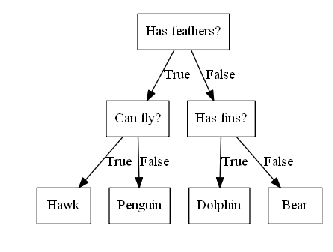

In [6]:
# import mglearn as mglearn
mglearn.plots.plot_animal_tree()

# ILLUSTRATION USING IRIS DATASET

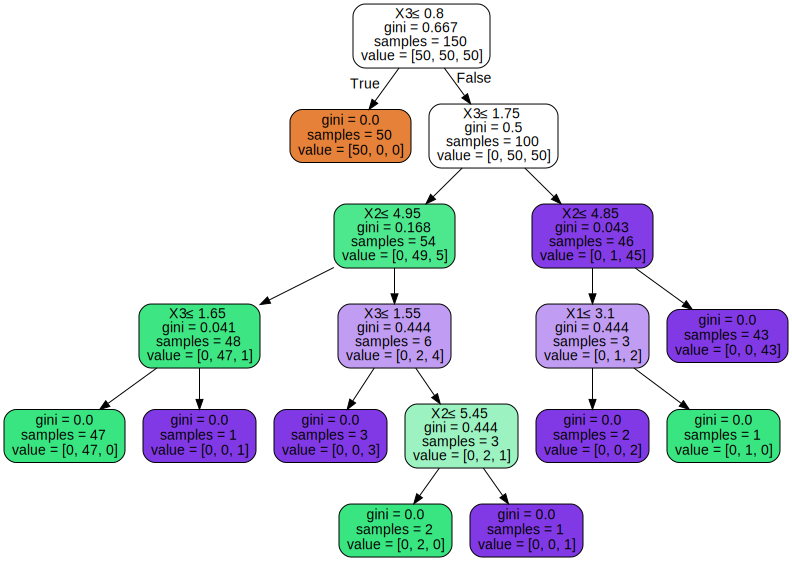

In [7]:
# import sklearn.datasets as datasets
# import pandas as pd
iris=datasets.load_iris()
#Creating the dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)
from IPython.display import Image  
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="tree_iris.dot",  
                filled=True, rounded=True,
                special_characters=True)
import graphviz
with open("tree_iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# CREATING DECISION TREES FOR BREAST CANCER DATA SET – unpruned tree

In [8]:
import sklearn.datasets as datasets
import pandas as pd
cancer=datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:,.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# note: ACCURACY ON TRAINING SET IS 100% AS LEAVES ARE PURE AND WE DID NOT 
# RESTRICT THE DEPTH OF THE TREE
# note 2: UNPRUNED TREES ARE PRONE TO OVERFITTING AND NOT GENERALIZING WELL 
# TO NEW DATA LEADING TO A TEST ACCURACY SLIGHTLY WORSE THAN LINEAR MODELS

Accuracy on training set: 1.000
Accuracy on test set: 0.937


# CREATING DECISION TREES FOR BREAST CANCER DATA SET – pruned tree

In [9]:
import sklearn.datasets as datasets
import pandas as pd
cancer=datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth= 4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:,.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Note: ACCURACY ON TRAINING IS SLIGHTLY MORE REALISTIC NOW THAT MAX DEPTH IS SET

Accuracy on training set: 0.988
Accuracy on test set: 0.951


# Analyzing decision trees

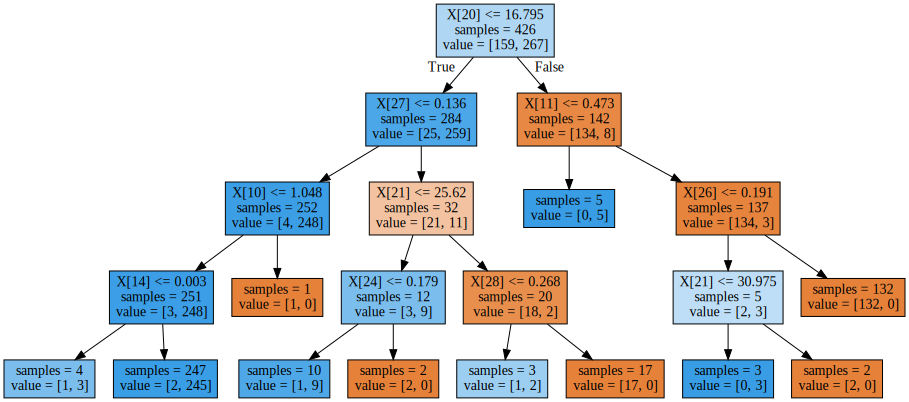

In [10]:
from sklearn.tree import export_graphviz
# We can visualize the tree using the export_graphviz function from the tree module
export_graphviz(tree, out_file="tree.dot",  
                impurity=False, filled=True)
#This writes the data in the .dot file - a text file for storing graphs.
#Set an option to color the nodes to majority class in each node and pass the class and feature names
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Feature Importance in Trees

In [11]:
# Rates importance of each feature for the decision a tree makes
# Number between 0 and 1 for each feature, 0=Not used at all, 1=Perfectly Predicts Target

print("Feature importance: \n{}".format(tree.feature_importances_))

Feature importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


# Visualizing Features Importance

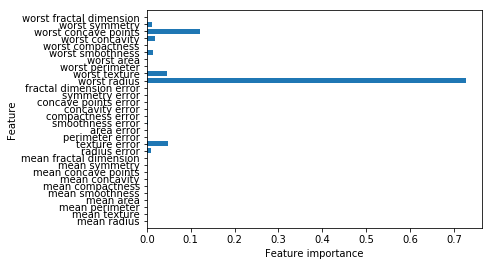

In [12]:
#import matplotlib.pyplot as plt
#import numpy as np

def plot_feature_importances_cancer(model):
       n_features = cancer.data.shape[1] 
       plt.barh(range(n_features), model.feature_importances_, align='center')
       plt.yticks(np.arange(n_features), cancer.feature_names)
       plt.xlabel("Feature importance")
       plt.ylabel("Feature")
       plt.ylim(-1, n_features)
       
plot_feature_importances_cancer(tree)

# Illustration of Feature Importance

Feature importances: [0. 1.]


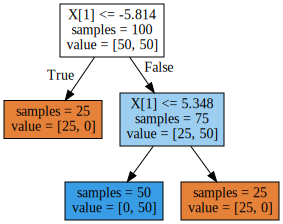

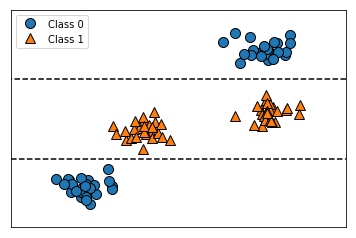

In [13]:
# import mglearn as mglearn

# plot shows dataset with two features and two classes
# all information containted in X[1] and X[0] is not included
# relation between X[1] and output class is not monotonous

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# HISTORICAL COMPUTER MEMORY (RAM) PRICES

Text(0, 0.5, 'Price in $/Mbyte')

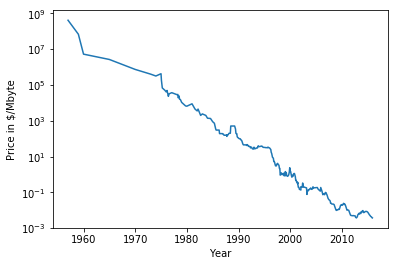

In [14]:
#import mglearn as mglearn
#import os
#import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
#import matplotlib.pyplot as plt
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")


# Comparing Decision Tree Regression and Linear Regression

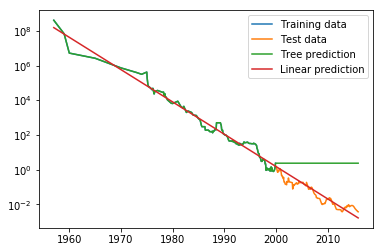

In [15]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# import numpy as np
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

# NOTE: The DecisionTreeRegressor cannot extrapolate outside the range of the training data.  
# Thus, while LinearRegression continues to extrapolate, the DecisionTreeRegressor keeps 
# predicting the last known points.

# ANALYZING RANDOM FORESTS

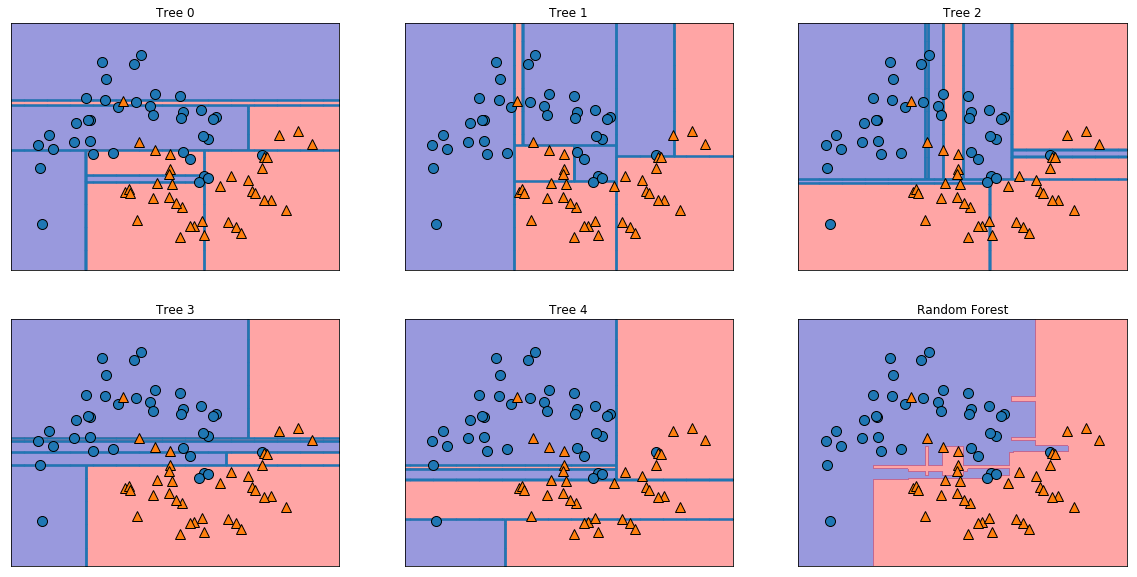

In [16]:
# Generate Dataset
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_moons
# import mglearn as mglearn
# import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

#NOTE: Each decision boundary in the first 5 trees has some mistakes as some of the points plotted were
# not actually included in the training sets of the trees due to bootstrap sampling.
# The Random Forest overfits less than any of the 5. Real-world would use 100s-1000s of trees

# Random forest consisting of 100 trees - breast cancer dataset

Accuracy on training set: 1.000
Accuracy on test set: 0.972


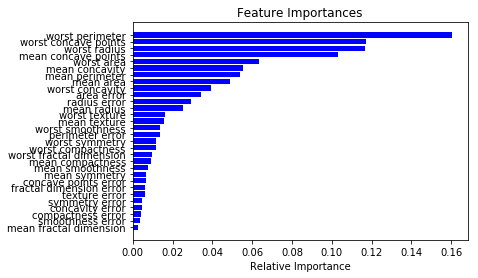

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

#from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# import numpy as np
# import matplotlib.pyplot as plt
importances = forest.feature_importances_

features = cancer['feature_names']
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# NOTE: The random forest gives us an accuracy of 97%, better than the linear models or a single
# decision tree, without tuning any parameters.

# Gradient boosted trees consisting of 100 trees on the breast cancer dataset with maximum depth 3, learning rate 0.1

Accuracy on training set: 1.000
Accuracy on test set: 0.958


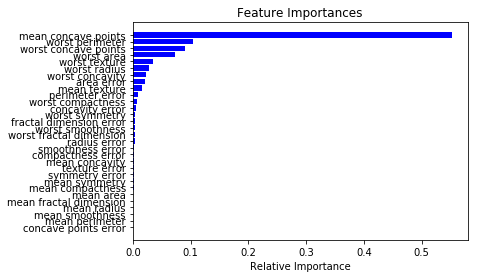

In [18]:
# Generate Dataset
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

#from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

# import numpy as np
# import matplotlib.pyplot as plt
importances = gbrt.feature_importances_
features = cancer['feature_names']
indices = np.argsort(importances)
# Ranked Feature Importance
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# NOTE: As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, 
# we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate.

# Experimenting with Gradient boosted trees consisting of 100 trees on the breast cancer dataset and maxdepth =1

In [19]:
# Generate Dataset
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

# import numpy as np
# import matplotlib.pyplot as plt
importances = gbrt.feature_importances_
features = cancer['feature_names']
indices = np.argsort(importances)
def plot_feature_importances_cancer(model):
       n_features = cancer.data.shape[1] 
       plt.barh(range(n_features), model.feature_importances_, align='center')
       plt.yticks(np.arange(n_features), cancer.feature_names)
       plt.xlabel("Feature importance")
       plt.ylabel("Fetaure")
       plt.ylim(-1, n_features)   
       plot_feature_importances_cancer(gbrt)

Accuracy on training set: 0.991
Accuracy on test set: 0.972


# Experimenting with Gradient boosted trees consisting of 100 trees on the breast cancer dataset and learningrate = 0.01

In [20]:
# Generate Dataset
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

# import numpy as np
# import matplotlib.pyplot as plt
importances = gbrt.feature_importances_
features = cancer['feature_names']
indices = np.argsort(importances)
def plot_feature_importances_cancer(model):
       n_features = cancer.data.shape[1] 
       plt.barh(range(n_features), model.feature_importances_, align='center')
       plt.yticks(np.arange(n_features), cancer.feature_names)
       plt.xlabel("Feature importance")
       plt.ylabel("Fetaure")
       plt.ylim(-1, n_features)   
       plot_feature_importances_cancer(gbrt)

# NOTE: Both methods of decreasing the model complexity reduced the training set accuracy, as expected. 
# In this case, lowering the maximum depth of the trees provided a significant improvement of the model, 
# while lowering the learning rate only increased the generalization performance slightly.

Accuracy on training set: 0.988
Accuracy on test set: 0.965


# KERNALIZED SUPPORT VECTOR MACHINE – blobs dataset

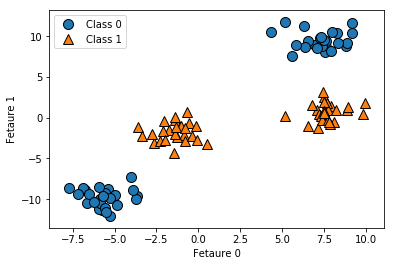

In [21]:
# Generate Dataset
# import mglearn as mglearn
# from sklearn.datasets import make_blobs
# from sklearn.svm import LinearSVC
# import matplotlib.pyplot as plt
# import numpy as np

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")
plt.legend(["Class 0", "Class 1"])

# NOTE: Two-class classification dataset in which classes are not linearly separable

Text(0, 0.5, 'Fetaure 1')

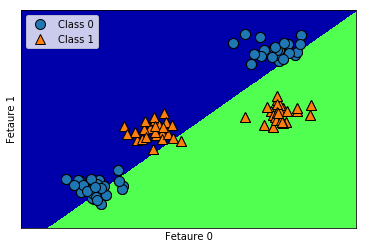

In [23]:
# import mglearn as mglearn
# from sklearn.datasets import make_blobs
# from sklearn.svm import LinearSVC
# import matplotlib.pyplot as plt
# import numpy as np

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")
plt.legend(["Class 0", "Class 1"])
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_classification(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")

# NOTE: Decision boundary found by a linear SVM

# ADDING SQUARE OF THE SECOND FEATURE

Text(0.5, 0, 'feature1 ** 2')

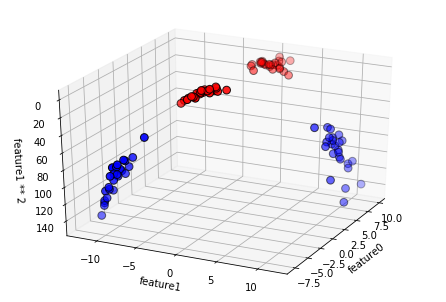

In [22]:
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()

# visualize in 3D
ax = Axes3D(figure, elev=-152,azim=-26)

# plot first all the points with y = 0, then all with y = 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# NOTE: Linearly separable with transformation in three dimensions
# Expansion of the dataset shown created by adding a third feature derived from feature1

# Fitting a linear model to augmented data

Text(0.5, 0, 'feature1 ** 2')

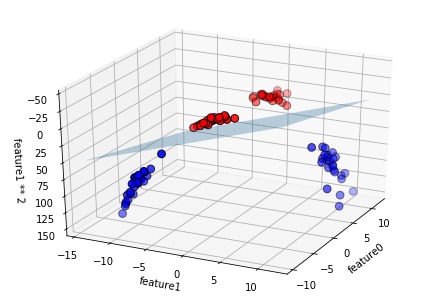

In [24]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#show linear decision boundary
figure = plt.figure()

# visualize in 3D
ax = Axes3D(figure, elev=-152,azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 0].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', 
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# NOTE: Decision boundary found by a linear SVM on the expanded three-dimensional dataset

# Function of the original model

Text(0, 0.5, 'Fetaure 1')

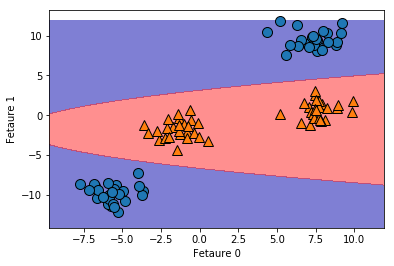

In [25]:
ZZ =  YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")

# NOTE: The Decision boundary as a function of the two original two features - ellipse
# As a function of the original features, the linear SVM model is not actually linear anymore. 
# It is not a line, but more of an ellipse.

# TRAINING SVM ON FORGE DATA SET USING GAUSSIAN KERNEL

Text(0, 0.5, 'Fetaure 1')

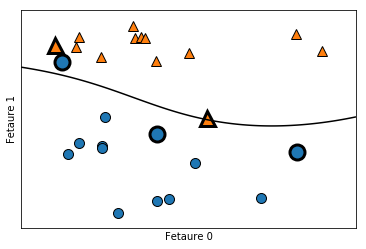

In [26]:
#Using mglearn library and kernalized svm
# Generate Dataset
# import mglearn as mglearn
# from sklearn.svm import SVC
# import matplotlib.pyplot as plt
X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv=svm.support_vectors_

#class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")

# NOTE: SVM yields a very smooth and nonlinear boundary by adjusting two parameters C and Gamma
# default C=1, Gamma=1/n features

# TUNING SVM PARAMETERS - GAMMA AND C

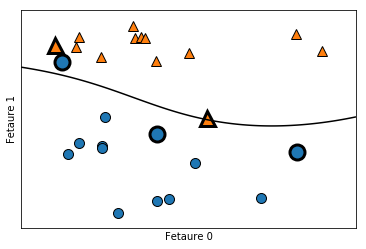

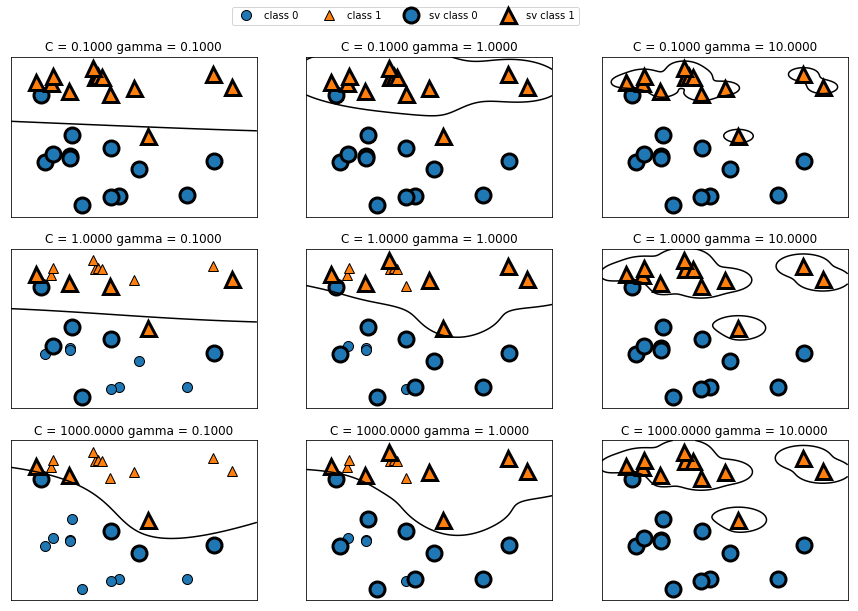

In [28]:
# Using mglearn library and kernalized svm
# Generate Dataset
# import mglearn as mglearn
# from sklearn.svm import SVC
# import matplotlib.pyplot as plt
X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv=svm.support_vectors_

#class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], 
    ncol=4, loc=(.9, 1.2))

# NOTE: Low gamma and high C give us the best fit (see lower left corner plot)

# Applying rbf kernel svm to the breast cancer dataset

Accuracy on training set: 1.00
Accuracy on test set: 0.63


Text(0, 0.5, 'Feature magnitude')

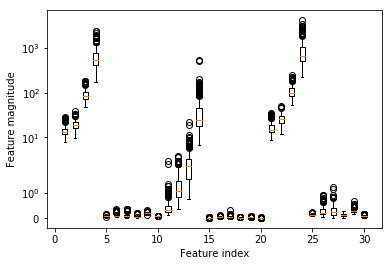

In [29]:
# Generate Dataset
# from sklearn.datasets import load_breast_cancer
# cancer = load_breast_cancer()
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

# import matplotlib.pyplot as plt
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# NOTE: Features are different order of magnitude

# PREPROCESSING DATA FOR SVM – RESCALING FEATURES

In [30]:
#compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

#compute the range of each feature (max-min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

# use the same transformation on the test set
# use min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

# adjusting C or gamma
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

# NOTE: Here, increasing C allows us to improve the model significantly, resulting in 97.2% accuracy. 

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy on training set: 0.955
Accuracy on test set: 0.951
Accuracy on training set: 0.993
Accuracy on test set: 0.972


# MULTILAYER PERCEPTRONS (MLPs)

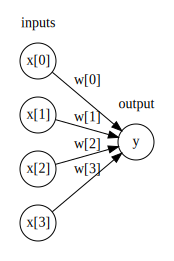

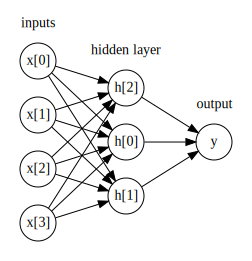

In [31]:
# import mglearn as mglearn

# Visualization of logistics regression
display(mglearn.plots.plot_logistic_regression_graph())
# Visualization of MLP
display(mglearn.plots.plot_single_hidden_layer_graph())

# NOTE: MLP has a lot more coefficients (also called weights) to learn: there is one between every 
# input and every hidden unit (which make up the hidden layer), 
# and one between every unit in the hidden layer and the output.

# FEATURES OF RELU AND TANH

Text(0, 0.5, 'relu(x), tanh(x)')

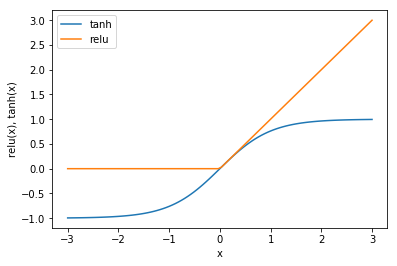

In [32]:
# import mglearn as mglearn
# import matplotlib.pyplot as plt
# import numpy as np

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

# NOTE: The hyperbolic tangent activation function and the rectified linear activation function
# NOTE: An important parameter that needs to be set by the user is the number of nodes in the hidden 
# layer. This can be as small as 10 for very small or simple datasets and as big as 10,000 
# for very complex data.


# APPLYING MLP TO TWO-MOONS DATASET

Text(0, 0.5, 'Feature 1')

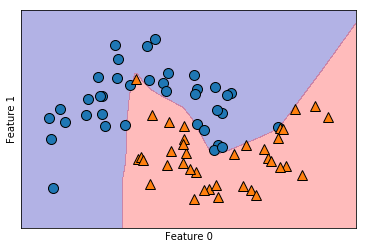

In [33]:
# import mglearn as mglearn
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# import matplotlib.pyplot as plt
# import numpy as np
mlp = MLPClassifier(solver='lbfgs', random_state=321).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# NOTE: Decision boundary learned by a neural network with 100 hidden units on the two_moons dataset
# NOTE: Solver = ‘lbfgs’, Default number of hidden nodes = 100 that are quite excessive for this application

# NOTE: The most important parameters are the number of layers and the number of hidden units per layer. You 
# should start with one or two hidden layers, and possibly expand from there. The number of nodes per hidden 
# layer is often similar to the number of input features, but rarely higher than in the low to mid-thousands.

# Reducing the hidden layer size

Text(0, 0.5, 'Feature 1')

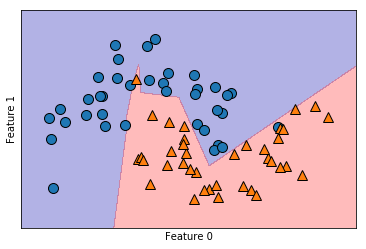

In [34]:
# import mglearn as mglearn
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# import matplotlib.pyplot as plt
# import numpy as np

mlp = MLPClassifier(solver='lbfgs', random_state=321, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# NOTE: With reduced complexity (less hidden nodes) the decision boundary is similar but somewhat 
# jagged.  To improve: 1) We can add another hidden layer, 2) Use the tanh nonlinearity

# Adding two hidden layers, with 10 units each and rectifier activation function (relu)

Text(0, 0.5, 'Feature 1')

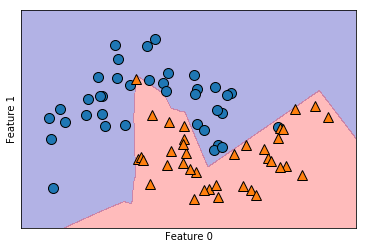

In [35]:
# import mglearn as mglearn
# from sklearn.neural_network  import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# import matplotlib.pyplot as plt
# import numpy as np
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=321, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# NOTE: Decision boundary learned using 2 hidden layers with 10 hidden units each, with rect activation function

# Adding two hidden layers, with 10 units each and tanh activation function

Text(0, 0.5, 'Feature 1')

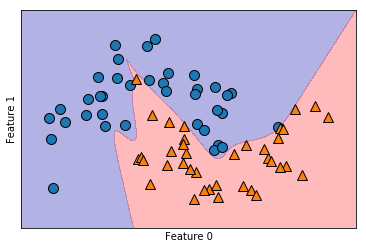

In [36]:
# import mglearn as mglearn
# from sklearn.neural_network  import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# import matplotlib.pyplot as plt
# import numpy as np

# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', activation ='tanh', random_state=321, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# NOTE: Decision boundary learned using 2 hidden layers with 10 hidden units each, with tanh activation function

# Using l2 penalty (alpha) regularization to compare performance of neural networks

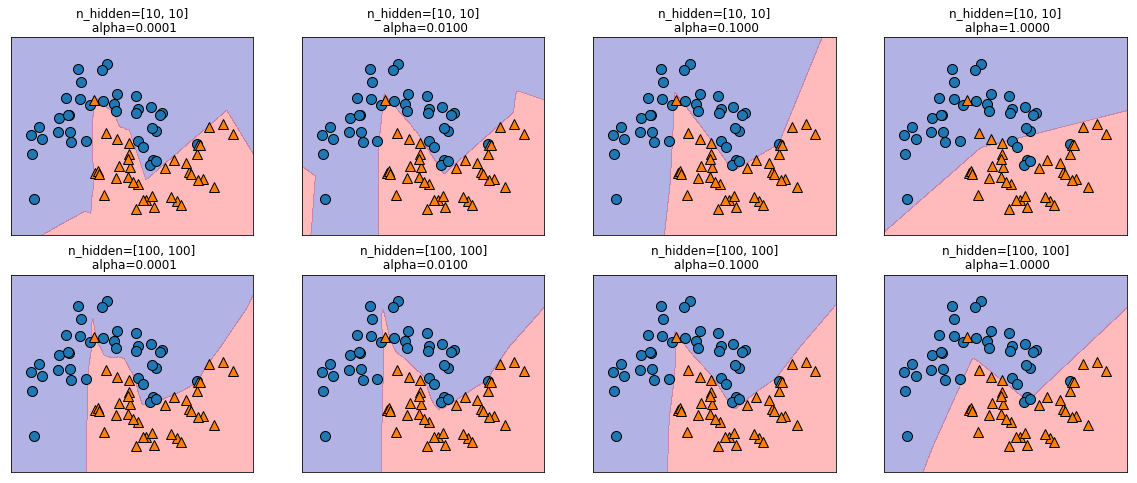

In [37]:
#import mglearn as mglearn
# from sklearn.neural_network  import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# import matplotlib.pyplot as plt
# import numpy as np

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=321, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\n alpha={:.4f}".format(
                    n_hidden_nodes, n_hidden_nodes, alpha))

# NOTES: We can also control the complexity of a neural network by using an l2 penalty to shrink the weights toward zero, 
# as we did in ridge regression and the linear classifiers. The parameter for this in the MLPClassifier is alpha (as in the 
# linear regression models), and it’s set to a very low value (little regularization) by default.

# Effects of random initialization on weights

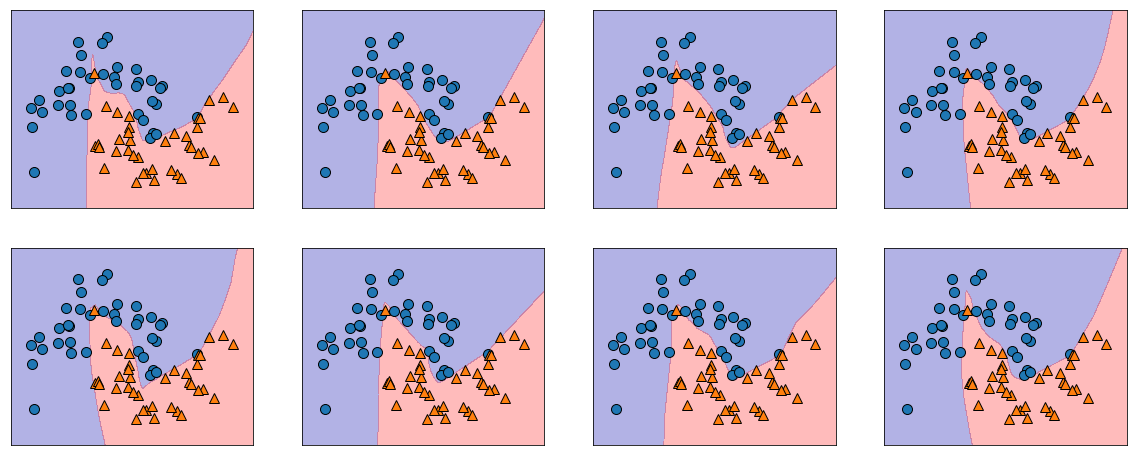

In [38]:
# import mglearn as mglearn
# from sklearn.neural_network  import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# import matplotlib.pyplot as plt
# import numpy as np

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, 
                            hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1], y_train, ax=ax)

# NOTES: Decision functions learned with the same parameters but different random initializations

# Applying mlp to breast cancer dataset

In [39]:
# Generate Dataset
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network  import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(
            cancer.data, cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []

mlp = MLPClassifier(random_state=321)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

# NOTE: The accuracy of the MLP is quite good, but not as good as the other models. As in the earlier SVC example, 
# this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, 
# and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

Accuracy on training set: 0.94
Accuracy on test set: 0.92


# RESCALING BREAST CANCER DATA

In [40]:
# Generate Dataset
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network  import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(
            cancer.data, cancer.target, random_state=0)
training_accuracy = []
test_accuracy = []

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

#subtract the mean, and scale by inversse standard deviation
#afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

#use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=321)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# NOTE: The results are much better after scaling, and already quite competitive. We got a warning from the model, 
# though, that tells us that the maximum number of iterations has been reached. This is part of the adam algorithm 
# for learning the model, and tells us that we should increase the number of iterations next.


Accuracy on training set: 0.993
Accuracy on test set: 0.965


# Setting maximum number of iterations

In [41]:
# Generate Dataset
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network  import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(
            cancer.data, cancer.target, random_state=0)
training_accuracy = []
test_accuracy = []

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

#subtract the mean, and scale by inversse standard deviation
#afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

#use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(max_iter=1000, random_state=321)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# NOTE: Increasing the number of iterations only increased the training set performance, not the 
# generalization performance. Still, the model is performing quite well. As there is some gap between 
# the training and the test performance, we might try to decrease the model’s complexity to get better 
# generalization performance.

Accuracy on training set: 1.000
Accuracy on test set: 0.965


# Looking at importance of weights

Accuracy on training set: 1.000
Accuracy on test set: 0.965


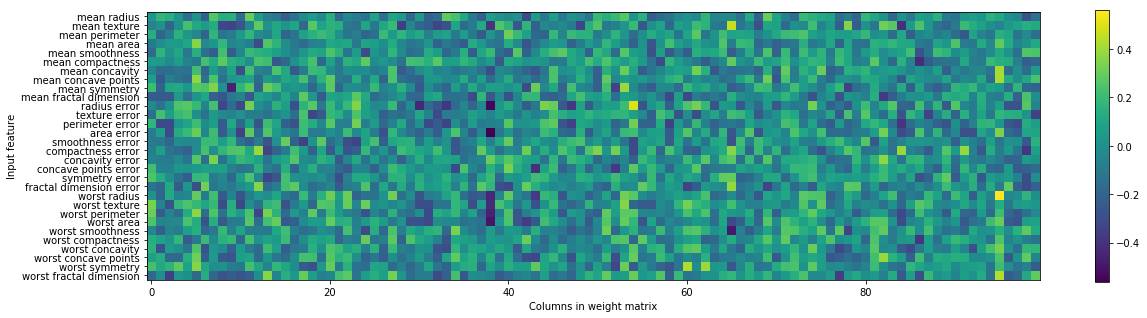

In [45]:
# Generate Dataset
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network  import MLPClassifier
# import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(
            cancer.data, cancer.target, random_state=0)
training_accuracy = []
test_accuracy = []

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

#subtract the mean, and scale by inversse standard deviation
#afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
#use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(max_iter=1000, random_state=42)

mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

# NOTE: The following plot (Figure   2-54) shows the weights that were learned connecting 
# the input to the first hidden layer. The rows in this plot correspond to the 30 input features, 
# while the columns correspond to the 100 hidden units. Light colors represent large positive values, 
# while dark colors represent negative values.
# Heat map of the first layer weights in a neural network learned on the Breast Cancer dataset

In [47]:
## More on Deep Learning Libriaries:
# While the MLPClassifier and MLPRegressor provide easy-to-use interfaces for the most common neural network architectures, 
# they only capture a small subset of what is possible with neural networks. If you are interested in working with more 
# flexible or larger models, we encourage you to look beyond scikit-learn into the fantastic deep learning libraries that 
# are out there. For Python users, the most well-established are keras, lasagna, and tensor-flow. lasagna builds on the 
# theano library, while keras can use either tensor-flow or theano. These libraries provide a much more flexible interface 
# to build neural networks and track the rapid progress in deep learning research.

# RUNNING NEURAL NETWORK USING TENSORFLOW

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

plt.imshow(np.reshape(mnist.train.images[8], [28, 28]), cmap='gray')
plt.show()

learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network parameters
n_hidden_1 = 10 # 1st layer number of neuwrons
n_hidden_2 = 10 # 2nd layer of neurons
num_input = 784 #MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


<Figure size 640x480 with 1 Axes>

In [6]:
# Store layers weight & bias
weights = {
        'h1':
            tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2':
            tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out':
            tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
            'b1':
                tf.Variable(tf.random_normal([n_hidden_1])),
            'b2':
                tf.Variable(tf.random_normal([n_hidden_2])),
            'out':
                tf.Variable(tf.random_normal([num_classes]))
}


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Create model
def neural_net(x):
# Hidden fully connected layer with 10 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
# Hidden fully connected layer with 10 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
# Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer
    
# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

#Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [8]:
#Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        if step % display_step == 0 or step == 1:
            #Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y:batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
              "{:.4f}".format(loss) + ", Training Accuracy= " + \
              "{:.3f}".format(acc))
    print("Optimization Finished")        
    # Calculate accuracy for MNIST test images
   
    print("Testing Accuracy: ", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

Step 1, Minibatch Loss= 183.2007, Training Accuracy= 0.156
Step 100, Minibatch Loss= 1.0882, Training Accuracy= 0.750
Step 200, Minibatch Loss= 0.5075, Training Accuracy= 0.812
Step 300, Minibatch Loss= 0.5838, Training Accuracy= 0.836
Step 400, Minibatch Loss= 0.5455, Training Accuracy= 0.797
Step 500, Minibatch Loss= 0.2395, Training Accuracy= 0.906
Optimization Finished
Testing Accuracy:  0.8606


In [11]:
print(mnist.train.next_batch)

<bound method DataSet.next_batch of <tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000251628BC5F8>>


# Decision Functions

In [51]:
# import mglearn as mglearn
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.ensemble  import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

#We rename the classes "blue" and "red" for illustration purposes.
y_named = np.array(["blue", "red"])[y]

# split the wave dataset into training and a test set
# We can call train_test_split with arbitrarily many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

# Show the first few entires of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions: \n{}".format(gbrt.predict(X_test)))

# NOTE: For binary classification, the “negative” class is always the first entry of the classes_ attribute, 
# and the “positive” class is the second entry of classes_. So if you want to fully recover the output of 
# predict, you need to make use of the classes_ attribute:

# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

# NOTE: The range of decision_function can be arbitrary, and depends on the data and the model parameters:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
        np.min(decision_function), np.max(decision_function)))

# NOTE: In the binary classification case, the return value of decision_function is of shape (n_samples,),
# and it returns one floating-point number for each sample. This value encodes how strongly the model believes 
# a data point to belong to the “positive” class, in this case class 1. Positive values indicate a preference 
# for the positive class, and negative values indicate a preference for the “negative” (other) class.

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]
Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions: 
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
pred is equal to predictions: True
Decision function minimum: -7.69 maximum: 4.29


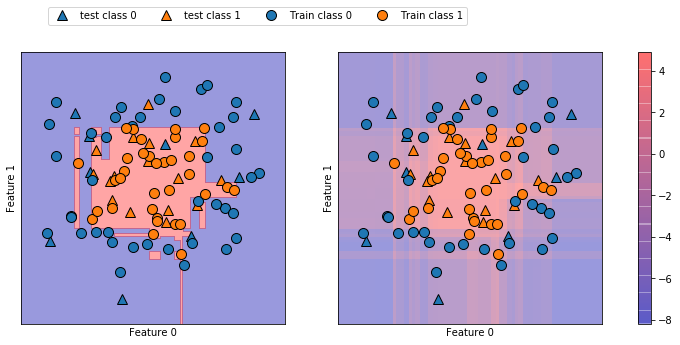

In [52]:
# NOTE: In the following example we plot the decision_function for all points in the 2D plane using a color coding, 
# next to a visualization of the decision boundary, as we saw earlier. We show training points as circles and 
# test data as triangles

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

# NOTE: Encoding not only the predicted outcome but also how certain the classifier is provides additional 
# information. However, in this visualization, it is hard to make out the boundary between the two classes.

# Predicting probabilities

Shape of probabilities: (25, 2)
Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


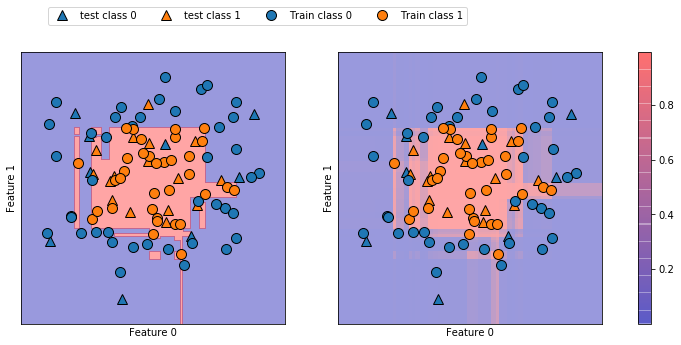

In [53]:
# NOTE: The output of predict_proba is a probability for each class, and is often more easily understood 
# than the output of decision_function. It is always of shape (n_samples, 2) for binary classification:

print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

# NOTE: The first entry in each row is the estimated probability of the first class, and
# the second entry is the estimated probability of the second class. Because it is a probability, 
# the output of predict_proba is always between 0 and 1, and the sum of the entries for both classes is always 1.
# Because the probabilities for the two classes sum to 1, exactly one of the classes will be above 50% certainty. 
# That class is the one that is predicted.

# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

# NOTE: In the following example (Figure   2-56) we again show the decision boundary on the dataset, next to the class 
# probabilities for the class 1:
# Decision boundary (left) and predicted probabilities for the gradient boosting model shown 
# The boundaries in this plot are much more well-defined, and the small areas of uncertainty are clearly visible.

# Uncertainty in multiclass classification

In [54]:
# NOTE: The decision_function and predict_proba methods also work in the multiclass setting. 
# Let’s apply them on the Iris dataset, which is a three-class classification dataset:

# from sklearn.ensemble  import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# import sklearn.datasets as datasets
iris=datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

# NOTE: In the multiclass case, the decision_function has the shape (n_samples, n_classes) and each column 
# provides a “certainty score” for each class, where a large score means that a class is more likely and a 
# small score means the class is less likely.

print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# Show the first few entires of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

# NOTE: You can recover the predictions from these scores by finding the maximum entry for each data point:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions: \n{}".format(gbrt.predict(X_test)))

# NOTE: The output of predict_proba has the same shape, (n_samples, n_classes). Again, the probabilities for 
# the possible classes for each data point sum to 1:
# Show the first few entires of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6, :]))
# Show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

# NOTE We can again recover the predictions by computing the argmax of predict_proba:
print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions: \n{}".format(gbrt.predict(X_test)))

Decision function shape: (38, 3)
Decision function:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]
Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predicted probabilities:
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
Sums: [1. 1. 1. 1. 1. 1.]
Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
